<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/saskeli/x/blob/master/pandas3.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

|                                       -                                       |                                       -                                       |                                       -                                       |
|-------------------------------------------------------------------------------|-------------------------------------------------------------------------------|-------------------------------------------------------------------------------|
| [Exercise 1 (split date continues)](<#Exercise-1-(split-date-continues&#41;>) |      [Exercise 2 (cycling weather)](<#Exercise-2-(cycling-weather&#41;>)      |            [Exercise 3 (top bands)](<#Exercise-3-(top-bands&#41;>)            |
|     [Exercise 4 (cyclists per day)](<#Exercise-4-(cyclists-per-day&#41;>)     |  [Exercise 5 (best record company)](<#Exercise-5-(best-record-company&#41;>)  |    [Exercise 6 (suicide fractions)](<#Exercise-6-(suicide-fractions&#41;>)    |
|      [Exercise 7 (suicide weather)](<#Exercise-7-(suicide-weather&#41;>)      |   [Exercise 8 (bicycle timeseries)](<#Exercise-8-(bicycle-timeseries&#41;>)   |              [Exercise 9 (commute)](<#Exercise-9-(commute&#41;>)              |



# Pandas (continues)

## Catenating datasets

We already saw in the NumPy section how we can catenate arrays along an axis: `axis=0` catenates vertically and `axis=1` catenates horizontally, and so on. With the DataFrames of Pandas it works similarly except that the row indices and the column names require extra attention. Also note a slight difference in the name: `np.concatenate` but `pd.concat`.

Let's start by considering catenation along the axis 0, that is, vertical catenation. We will first make a helper function to easily create DataFrames for testing.

#### <div class="alert alert-info">Exercise 1 (split date continues)</div>

Write function `split_date_continues` that does

* read the bicycle data set
* clean the data set of columns/rows that contain only missing values
* drops the `Päivämäärä` column and replaces it with its splitted components as before

Use the `concat` function to do this. The function should return a DataFrame with 25 columns (first five related to the date and then the rest 20 conserning the measument location.

<hr/>

In [1]:
#!/usr/bin/env python3

import pandas as pd


def split_date(df):
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]

    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:, 0]

    days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
    months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1,13)))

    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)
    
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d

def split_date_continues():
    d= pd.read_csv("Helsingin_pyorailijamaarat.csv", sep=";")

    df1=d.dropna(how="all")
    df2= df1.dropna(axis=1, how="all")

    df3 = split_date(df2)

    df4= df2.drop(["Päivämäärä"], axis = 1)
    
    df5= pd.concat([df3,df4], axis= 1)
    return df5

def main():
    df = split_date_continues()
    print("Shape:", df.shape)
    print("Column names:\n", df.columns)
    print(df.head())  
    


if __name__ == "__main__":
    main()


Shape: (37128, 25)
Column names:
 Index(['Weekday', 'Day', 'Month', 'Year', 'Hour', 'Auroransilta',
       'Eteläesplanadi', 'Huopalahti (asema)', 'Kaisaniemi/Eläintarhanlahti',
       'Kaivokatu', 'Kulosaaren silta et.', 'Kulosaaren silta po. ',
       'Kuusisaarentie', 'Käpylä, Pohjoisbaana',
       'Lauttasaaren silta eteläpuoli', 'Merikannontie',
       'Munkkiniemen silta eteläpuoli', 'Munkkiniemi silta pohjoispuoli',
       'Heperian puisto/Ooppera', 'Pitkäsilta itäpuoli',
       'Pitkäsilta länsipuoli', 'Lauttasaaren silta pohjoispuoli',
       'Ratapihantie', 'Viikintie', 'Baana'],
      dtype='object')
  Weekday  Day  Month  Year  Hour  Auroransilta  Eteläesplanadi  \
0     Wed    1      1  2014     0           NaN             7.0   
1     Wed    1      1  2014     1           NaN             5.0   
2     Wed    1      1  2014     2           NaN             2.0   
3     Wed    1      1  2014     3           NaN             5.0   
4     Wed    1      1  2014     4           Na

## Merging dataframes

#### <div class="alert alert-info">Exercise 2 (cycling weather)</div>

Merge the processed cycling data set (from the previous exercise) and weather data set along the columns year, month, and day. Note that the names of these columns might be different in the two tables: use the `left_on` and `right_on` parameters. Then drop useless columns 'm', 'd', 'Time', and 'Time zone'.

Write function `cycling_weather` that reads the data sets and returns the resulting DataFrame.

<hr/>

In [2]:
#!/usr/bin/env python3

import pandas as pd

def split_date(df):
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]

    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:, 0]

    days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
    months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1,13)))

    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)
    
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d

def split_date_continues():
    d= pd.read_csv("Helsingin_pyorailijamaarat.csv", sep=";")

    df1=d.dropna(how="all")
    df2= df1.dropna(axis=1, how="all")

    df3 = split_date(df2)

    df4= df2.drop(["Päivämäärä"], axis = 1)
    
    df5= pd.concat([df3,df4], axis= 1)
    return df5

def cycling_weather():
    df = pd.read_csv("kumpula-weather-2017.csv", sep= ",")
    df1 = split_date_continues()
    df2 = pd.merge(df1,df,left_on=['Year', 'Month','Day'], right_on=['Year', 'm', 'd'])
    df2.drop({'m', 'd', 'Time', 'Time zone'}, axis = 1, inplace = True)

    return df2

def main():
    print(cycling_weather())

if __name__ == "__main__":
    main()


     Weekday  Day  Month  Year  Hour  Auroransilta  Eteläesplanadi  \
0        Sun    1      1  2017     0           NaN            11.0   
1        Sun    1      1  2017     1           NaN             3.0   
2        Sun    1      1  2017     2           NaN             2.0   
3        Sun    1      1  2017     3           NaN             2.0   
4        Sun    1      1  2017     4           NaN             1.0   
...      ...  ...    ...   ...   ...           ...             ...   
8755     Sun   31     12  2017    19           2.0             3.0   
8756     Sun   31     12  2017    20           2.0             5.0   
8757     Sun   31     12  2017    21           4.0             7.0   
8758     Sun   31     12  2017    22           1.0             7.0   
8759     Sun   31     12  2017    23           8.0             5.0   

      Huopalahti (asema)  Kaisaniemi/Eläintarhanlahti  Kaivokatu  ...  \
0                    8.0                         14.0        NaN  ...   
1            

#### <div class="alert alert-info">Exercise 3 (top bands)</div>

Merge the DataFrames UK top40 and the bands DataFrame that are stored in the `src` folder.
Do all this in the parameterless function `top_bands`, which should return the merged DataFrame.
Use the `left_on` and `right_on` parameters to `merge`. Test your function from the `main` function.

<hr/>

In [3]:
#!/usr/bin/env python3

import pandas as pd

def top_bands():
    d= pd.read_csv("bands.tsv", sep="\t")
    d["Band"]= d["Band"].str.upper()
    d1 = pd.read_csv("UK-top40-1964-1-2.tsv", sep = "\t")
    df= pd.merge(d,d1, how="left", left_on="Band", right_on="Artist" )
    return pd.DataFrame(df)

def main():
    df= top_bands()
    #print(df.shape())
    print(df)

if __name__ == "__main__":
    main()


                          Band           Singer      Lead guitar  \
0                  THE BEATLES              All  George Harrison   
1                  THE BEATLES              All  George Harrison   
2          THE DAVE CLARK FIVE       Mike Smith   Lenny Davidson   
3     FREDDIE AND THE DREAMERS  Freddie Garrity     Roy Crewdson   
4                  THE SHADOWS                -      Hank Marvin   
5           THE ROLLING STONES      Mick Jagger   Keith Richards   
6     GERRY AND THE PACEMAKERS    Gerry Marsden    Gerry Marsden   
7                  THE HOLLIES     Allan Clarke      Graham Nash   
8  JOHNNY KIDD AND THE PIRATES      Johnny Kidd       Mick Green   

   Rhythm guitar            Bass          Drums  Pos  LW  \
0    John Lennon  Paul McCartney     Ringo Star    1   1   
1    John Lennon  Paul McCartney     Ringo Star    3   2   
2   Denis Payton     Rick Huxley     Dave Clark    2   6   
3    Derek Quinn   Peter Birnell   Bernie Dwyer    4   3   
4    Bruce Welch   

## Aggregates and groupings

Let us use again the weather dataset. First, we make the column names a bit more uniform and concise. For example the columns `Year`, `m`, and `d` are not uniformly named.

We can easily change the column names with the `rename` method of the DataFrame. Note that we cannot directly change the index `wh.columns` as it is immutable.

#### <div class="alert alert-info">Exercise 4 (cyclists per day)</div>

This exercise can give two points at maximum!

Part 1.

Read, clean and parse the bicycle data set as before. Group the rows by year, month, and day. Get the sum for each group.
Make function `cyclists_per_day` that does the above. The function should return a DataFrame.
Make sure that the columns Hour and Weekday are not included in the returned DataFrame.

Part 2.

In the `main` function, using the function `cyclists_per_day`, get the daily counts.  The index of the DataFrame now consists of tuples (Year, Month, Day). Then restrict this data to August of year 2017, and plot this data. Don't forget to call the `plt.show` function of matplotlib. The x-axis should have ticks from 1 to 31, and there should be a curve to each measuring station. Can you spot the weekends?

<hr/>

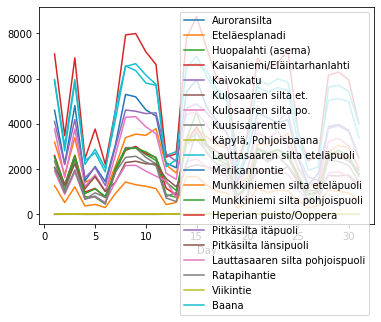

In [4]:
#!/usr/bin/env python3

import pandas as pd
import matplotlib.pyplot as plt

def split_date(df):
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]

    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:, 0]

    days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
    months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1,13)))

    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)
    
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d

def split_date_continues():
    d= pd.read_csv("Helsingin_pyorailijamaarat.csv", sep=";")

    df1=d.dropna(how="all")
    df2= df1.dropna(axis=1, how="all")

    df3 = split_date(df2)

    df4= df2.drop(["Päivämäärä"], axis = 1)
    
    df5= pd.concat([df3,df4], axis= 1)
    return df5


def cyclists_per_day():
    d= split_date_continues()
    d1 = d.drop(["Weekday", "Hour"], axis =1)
    dft = d1.groupby(["Year", "Month", "Day"]).sum()
    return dft
    
def main():
    d = cyclists_per_day()
    df = d.loc[(2017,8)]
    df.plot()
    plt.show()

if __name__ == "__main__":
    main()


#### <div class="alert alert-info">Exercise 5 (best record company)</div>

We use again the UK top 40 data set from the first week of 1964 in the `src` folder. Here we define "goodness" of a record company (`Publisher`) based on the sum of the weeks on chart (WoC) of its singles. Return a DataFrame of the singles by the best record company (a subset of rows of the original DataFrame). Do this with function `best_record_company`.

<hr/>

In [5]:
#!/usr/bin/env python3

import pandas as pd

def best_record_company():
    d= pd.read_csv("UK-top40-1964-1-2.tsv", sep = "\t")
    
    d1 = d.groupby("Publisher")
    d2 = d1["WoC"].sum().sort_values()
    
    df2 = d1.get_group(d2.index[-1])

    return df2

def main():
    d = (best_record_company())
    print(d)
    

if __name__ == "__main__":
    main()


    Pos  LW                    Title                    Artist Publisher  \
1     2   6            GLAD ALL OVER       THE DAVE CLARK FIVE  COLUMBIA   
3     4   3     YOU WERE MADE FOR ME  FREDDIE AND THE DREAMERS  COLUMBIA   
9    10   8        DON'T TALK TO HIM             CLIFF RICHARD  COLUMBIA   
11   12  11                 GERONIMO               THE SHADOWS  COLUMBIA   
15   16  12  YOU'LL NEVER WALK ALONE  GERRY AND THE PACEMAKERS  COLUMBIA   
24   25  25     I (WHO HAVE NOTHING)            SHIRLEY BASSEY  COLUMBIA   
39   40  Re            WALKING ALONE           RICHARD ANTHONY  COLUMBIA   

    Peak Pos  WoC  
1          2    7  
3          3    9  
9          2    9  
11        11    5  
15         1   13  
24         6   14  
39        37    2  


#### <div class="alert alert-info">Exercise 6 (suicide fractions)</div>

Load the suicide data set from `src` folder. This data was originally downloaded from [Kaggle](https://www.kaggle.com/szamil/who-suicide-statistics). Kaggle contains lots of interesting open data sets.

Write function `suicide_fractions` that loads the data set and returns a Series that has the country as the (row) index and as the column the mean fraction of suicides per population in that country. In other words, the value is the average of suicide fractions. The information about year, sex and age is not used.

<hr/>

In [6]:
#!/usr/bin/env python3

import pandas as pd
import numpy as np

def suicide_fractions():

    df = pd.read_csv("who_suicide_statistics.csv", sep= ",")
 
    df.set_index("country", inplace = True)
    df["mean_frac"] = df["suicides_no"]/df["population"]
    d1 = df.groupby("country")["mean_frac"].mean()
    return pd.Series(d1)

def main():
    d =(suicide_fractions())
    print(d)
    
    
if __name__ == "__main__":
    main()


country
Albania                               0.000035
Anguilla                                   NaN
Antigua and Barbuda                   0.000005
Argentina                             0.000105
Armenia                               0.000033
                                        ...   
Uruguay                               0.000187
Uzbekistan                            0.000088
Venezuela (Bolivarian Republic of)    0.000067
Virgin Islands (USA)                  0.000070
Zimbabwe                                   NaN
Name: mean_frac, Length: 141, dtype: float64


#### <div class="alert alert-info">Exercise 7 (suicide weather)</div>

Copy the function `suicide fractions` from the previous exercise. 

Implement function `suicide_weather` as described below.
We use the dataset of average temperature (over years 1961-1990) in different countries from `src/List_of_countries_by_average_yearly_temperature.html` (https://en.wikipedia.org/wiki/List_of_countries_by_average_yearly_temperature) .
You can use the function `pd.read_html` to get all the tables from a html page. By default `pd.read_html` does not know which row contains column headers and which column contains row headers. Therefore, you have to give both `index_col` and `header` parameters to `read_html`. Maku sure you use the country as the (row) index for both of the DataFrames. What is the [Spearman correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) between these variables? Use the `corr` method of Series object. Note the the two Series need not be sorted as the indices of the rows (country names) are used to align them.

The return value of the function `suicide_weather` is a tuple (suicide_rows, temperature_rows, common_rows, spearman_correlation)
The output from the `main` function should be of the following form:

```
Suicide DataFrame has x rows
Temperature DataFrame has x rows
Common DataFrame has x rows
Spearman correlation: x.x
```

You might have trouble when trying to convert the temperatures to float. The is because the negative numbers on that html page use a special *unicode minus sign*, which looks typographically nice, but the float constructor cannot interpret it as a minus sign. You can try out the following example:

<hr/>

## Time series

If a measurement is made at certain points in time, the resulting values with their measurement times is called a time series. In Pandas a Series whose index consists of dates/times is a time series.

#### <div class="alert alert-info">Exercise 8 (bicycle timeseries)</div>

Write function `bicycle_timeseries` that

* reads the data set
* cleans it
* turns its `Päivämäärä` column into (row) DatetimeIndex (that is, to row names) of that DataFrame
* returns the new DataFrame

<hr/>

In [7]:
#!/usr/bin/env python3

import pandas as pd

def split_date(df):
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]

    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:, 0]

    days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
    months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1,13)))

    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)
    
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d

def bicycle_timeseries():
    df = pd.read_csv("Helsingin_pyorailijamaarat.csv", sep=";")
    df.dropna(how="all",inplace =True)
    df.dropna(axis=1, how="all", inplace = True)

    df3 = split_date(df)
    df3["Date"] = pd.to_datetime(df3[["Year", "Month", "Day", "Hour"]])
    df3.drop(columns= ["Year", "Month", "Day", "Hour"], inplace= True)

    df.drop("Päivämäärä", axis=1, inplace=True)
    
    df4 = pd.concat([df,df3], axis = 1)
    df4.set_index("Date", inplace = True)
    return df4


def main():
    print(bicycle_timeseries())

if __name__ == "__main__":
    main()


                     Auroransilta  Eteläesplanadi  Huopalahti (asema)  \
Date                                                                    
2014-01-01 00:00:00           NaN             7.0                 NaN   
2014-01-01 01:00:00           NaN             5.0                 NaN   
2014-01-01 02:00:00           NaN             2.0                 NaN   
2014-01-01 03:00:00           NaN             5.0                 NaN   
2014-01-01 04:00:00           NaN             1.0                 NaN   
...                           ...             ...                 ...   
2018-03-27 19:00:00          21.0            30.0                18.0   
2018-03-27 20:00:00          10.0            19.0                19.0   
2018-03-27 21:00:00           7.0            13.0                10.0   
2018-03-27 22:00:00           1.0             5.0                 5.0   
2018-03-27 23:00:00           0.0             0.0                 0.0   

                     Kaisaniemi/Eläintarhanlahti  

#### <div class="alert alert-info">Exercise 9 (commute)</div>

In function `commute` do the following:

Use the function `bicycle_timeseries` to get the bicycle data. Restrict to August 2017, group by the weekday, aggregate by summing. Set the `Weekday` column to numbers from one to seven. Then set the column `Weekday` as the (row) index. Return the resulting DataFrame from the function.

In the `main` function plot the DataFrame. Xticklabels should be the weekdays. Don't forget to call `show` function!

If you want the xticklabels to be `['Mon', 'Tue', 'Wed', 'Thu', 'Fr', 'Sat', 'Sun']` instead of numbers (1,..,7), then it may get a bit messy. There seems to be a problem with non-numeric `x` values. You could try the following after plotting, but you don't have to:

```python
weekdays="x mon tue wed thu fri sat sun".title().split()
plt.gca().set_xticklabels(weekdays)
```

<hr/>

         Auroransilta  Eteläesplanadi  Huopalahti (asema)  \
Weekday                                                     
1                 0.0         10155.0              7043.0   
2                 0.0         11353.0             11083.0   
3                 0.0          6547.0              2754.0   
4                 0.0          5628.0              2789.0   
5                 0.0         15630.0             11729.0   
6                 0.0         16529.0             15415.0   
7                 0.0         14890.0             12509.0   

         Kaisaniemi/Eläintarhanlahti  Kaivokatu  Kulosaaren silta et.  \
Weekday                                                                 
1                             7626.0        0.0                   3.0   
2                            10644.0        0.0                   7.0   
3                             4004.0        0.0                   6.0   
4                             3757.0        0.0                  14.0   
5           

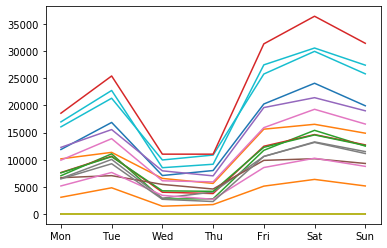

In [8]:
#!/usr/bin/env python3

import pandas as pd
import matplotlib.pyplot as plt

def split_date(df):
    d = df["Päivämäärä"].str.split(expand=True)
    d.columns = ["Weekday", "Day", "Month", "Year", "Hour"]

    hourmin = d["Hour"].str.split(":", expand=True)
    d["Hour"] = hourmin.iloc[:, 0]

    days = dict(zip("ma ti ke to pe la su".split(), "Mon Tue Wed Thu Fri Sat Sun".split()))
    months = dict(zip("tammi helmi maalis huhti touko kesä heinä elo syys loka marras joulu".split(), range(1,13)))

    d["Weekday"] = d["Weekday"].map(days)
    d["Month"] = d["Month"].map(months)
    
    d = d.astype({"Weekday": object, "Day": int, "Month": int, "Year": int, "Hour": int})
    return d

def bicycle_timeseries():
    df = pd.read_csv("Helsingin_pyorailijamaarat.csv", sep=";")
    df.dropna(how="all",inplace =True)
    df.dropna(axis=1, how="all", inplace = True)

    df3 = split_date(df)
    df3["Date"] = pd.to_datetime(df3[["Year", "Month", "Day", "Hour"]])
    df3.drop(columns= ["Year", "Month", "Day", "Hour"], inplace= True)

    df.drop("Päivämäärä", axis=1, inplace=True)
    
    df4 = pd.concat([df,df3], axis = 1)
    df4.set_index("Date", inplace = True)
    return df4

def commute():
    df= bicycle_timeseries()
    df = df["2017-08-01":"2017-08-31"]
    df1= df.groupby("Weekday").sum()
    days = dict(zip("Mon Tue Wed Thu Fri Sat Sun".split(), range(1,8)))
    df1.index=df1.index.map(days).sort_values()
    return df1
    
def main():
    df = (commute())
    print(df)
    plt.plot(df)
    weekdays="x mon tue wed thu fri sat sun".title().split()
    plt.gca().set_xticklabels(weekdays)
    plt.show()


if __name__ == "__main__":
    main()
